# Summarizing the Data
- What are the distibutions of data?
- What is the individual wearing the fitbit like?
- Are there trends over time? days, weeks, months?

Steps
- [x] univariate analysis
- [x] split into train and test data - 70% for train, 30% for validate, 20% for test
- [ ] explore trends over time
- [ ] make conclusions on individual wearing the fitbit

## Analyzing the Raw Data

In [1]:
import Prepare

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = Prepare.prep_data()

In [3]:
df.head()

cals_burned  steps  dist  floors  mins_sedentary  \
date                                                           
2018-04-26         2635   2931  1.38       2            1347   
2018-04-27         3649   9971  4.70      19            1158   
2018-04-28         3379   3521  1.66       2             702   
2018-04-29         2851   1639  0.77       0             891   
2018-04-30         2825   1323  0.62       0             880   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
date                                                                    
2018-04-26                   93                   0                 0   
2018-04-27                  219                  46                17   
2018-04-28                  155                  22                11   
2018-04-29                  122                   0                 0   
2018-04-30                  104                   0                 0   

            activity_cals  month   weekday  
date                                        
2018-04-26            566      4  Thursday  
2018-04-27           1752      4    Friday  
2018-04-28           1124      4  Saturday  
2018-04-29            602      4    Sunday  
2018-04-30            540      4    Monday

In [4]:
df.month.value_counts()

10    31
8     31
7     31
5     31
11    30
9     30
6     30
12     6
4      5
Name: month, dtype: int64

Initial Takeaways
- Data ranges from the months of April to December
- April and December are not complete, have less than a week of data
- What are the univariate distributions of the data like?

## Univariate Analysis

Text(0, 0.5, 'Count')

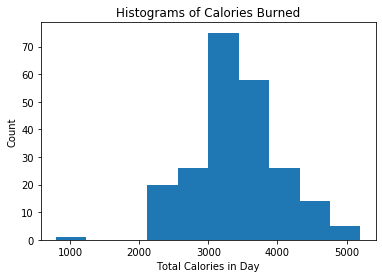

In [5]:
plt.hist(df.cals_burned)
plt.title('Histograms of Calories Burned')
plt.xlabel('Total Calories in Day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

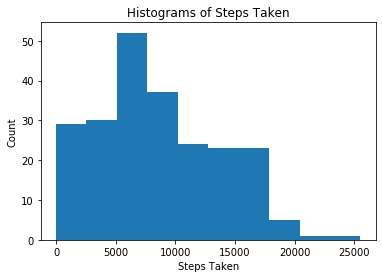

In [6]:
plt.hist(df.steps)
plt.title('Histograms of Steps Taken')
plt.xlabel('Steps Taken')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

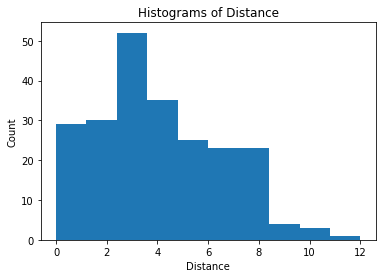

In [7]:
plt.hist(df.dist)
plt.title('Histograms of Distance')
plt.xlabel('Distance')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

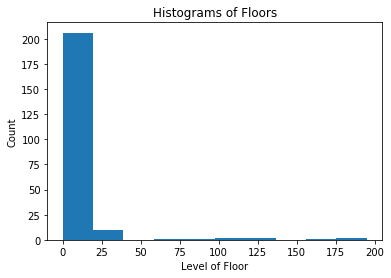

In [8]:
plt.hist(df.floors)
plt.title('Histograms of Floors')
plt.xlabel('Level of Floor')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

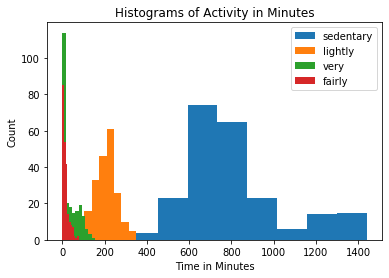

In [9]:
plt.hist(df.mins_sedentary)
plt.hist(df.mins_lightly_active)
plt.hist(df.mins_very_active)
plt.hist(df.mins_fairly_active)
plt.legend(['sedentary','lightly','very','fairly'])
plt.title('Histograms of Activity in Minutes')
plt.xlabel('Time in Minutes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

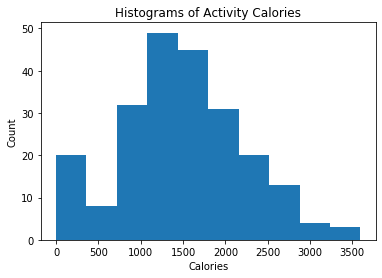

In [10]:
plt.hist(df.activity_cals)
plt.title('Histograms of Activity Calories')
plt.xlabel('Calories')
plt.ylabel('Count')

Takeaways
- Calories burned 
    - ranges from 1000 to 5000
    - normally distributed at 2k - 5k
    - mode at 3k
- Steps taken
    - ranges from 0 to 25,000
    - mode at around 6k
- Distance
    - ranges from 0 to 12
    - could be miles?
    - mode at 3
- Floors
    - ranges from 0 to almost 200
    - seems to have outliers at the higher range
    - most at 0 to 25
- Minutes of Activity
    - most acitivty at sedentary level
    - sedentary and lightly are normally distributed
    - fairly and very have peaks at the beginning minutes
- Activity Calories
    - normally distributed
    - ranges from 0 to 3.5k
    - mode at about 1300

## Splitting the Data
- will split data into 50% for train, 30% for validate, 20% for test
- data is already sorted by the date

In [11]:
# determining index for splitting the data
train_size = .50
n = df.shape[0]
train_end_index = round(train_size * n)
print('index to split train-validate:',train_end_index)

index to split train-validate: 112


In [12]:
# determining index for splitting the data
train_size = .30
n = df.shape[0]
validate_end_index = round(train_size * n) + train_end_index
print('index to split:',validate_end_index)

index to split: 180


In [13]:
train = df[:train_end_index] # everything up (not including) to the test_start_index
validate = df[train_end_index:validate_end_index] # everything from the test_start_index to the end
test = df[validate_end_index:] # everything from the test_start_index to the end

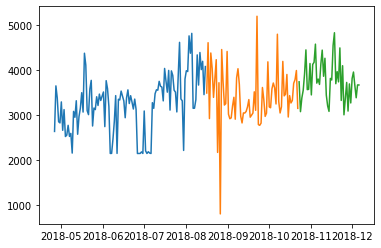

In [14]:
plt.plot(train.index, train.cals_burned)
plt.plot(validate.index, validate.cals_burned)
plt.plot(test.index, test.cals_burned)

## Exploring Trends
To determine the characteristics of the person wearing the fitbit, I will take a look at each feature in the data as it changes with time.
- What seasonality is present? 
- Can it be determined if the individual is an employee or reasearch participant?

Conclusions formed can also guide future modeling

### Calories Burned

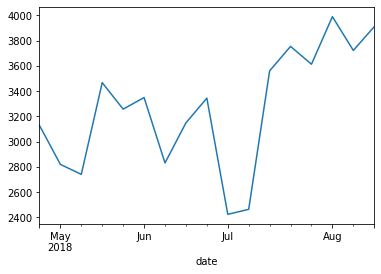

In [15]:
train.cals_burned.resample('W').mean().plot()

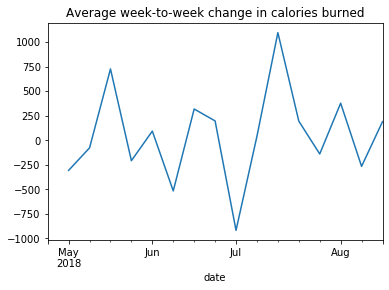

In [16]:
train['cals_burned'].resample('W').mean().diff().plot(title='Average week-to-week change in calories burned')


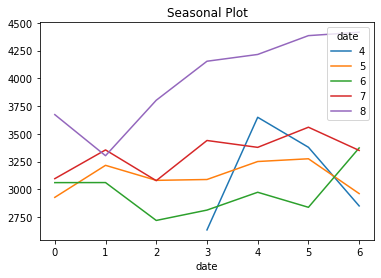

In [17]:
# .unstack turns an index level into columns
train['cals_burned'].groupby([train.index.month, train.index.weekday]).mean().unstack(0).plot(title='Seasonal Plot')

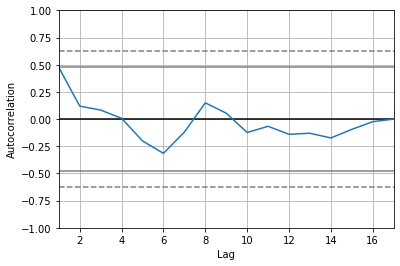

In [18]:
pd.plotting.autocorrelation_plot(train.cals_burned.resample('W').mean())

In [19]:
import statsmodels.api as sm

y = train.cals_burned.resample('D').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y        trend    seasonal       resid
date                                                   
2018-04-26  2635.0          NaN   21.981037         NaN
2018-04-27  3649.0          NaN   78.923895         NaN
2018-04-28  3379.0          NaN  109.781037         NaN
2018-04-29  2851.0  3041.571429  117.361395 -307.932823
2018-04-30  2825.0  3111.000000 -180.685629 -105.314371

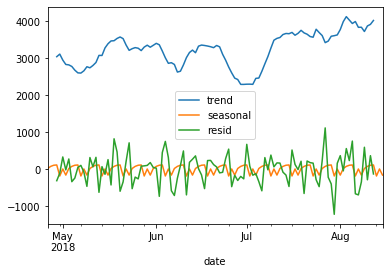

In [20]:
decomposition.iloc[:, 1:].plot()

### Steps

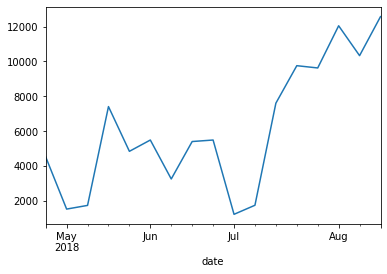

In [21]:
train.steps.resample('W').mean().plot()

### Distance

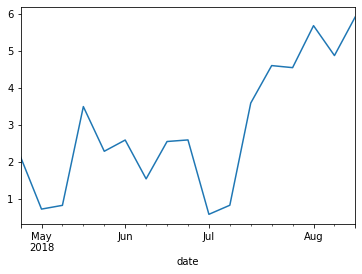

In [22]:
train.dist.resample('W').mean().plot()

### Floors

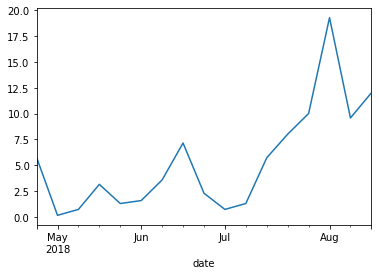

In [23]:
train.floors.resample('W').mean().plot()

### Activity Calories

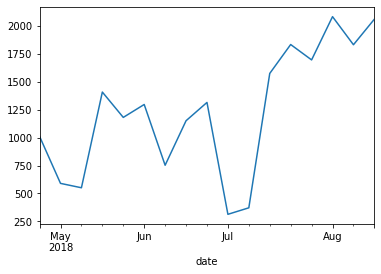

In [24]:
train.activity_cals.resample('W').mean().plot()

### Minutes Active Sedentary, Light, Fair, Very

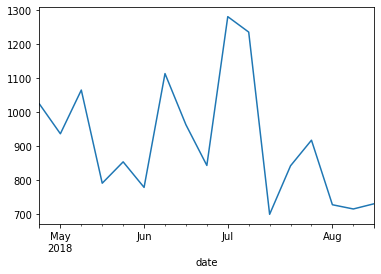

In [25]:
train.mins_sedentary.resample('W').mean().plot()

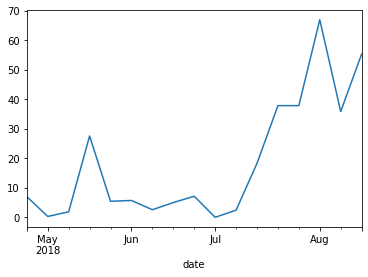

In [26]:
train.mins_very_active.resample('W').mean().plot()

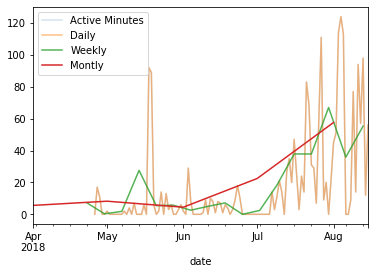

In [27]:
train.mins_very_active.plot(alpha=.2, label='Active Minutes')
train.mins_very_active.resample('D').mean().plot(alpha=.5, label='Daily')
train.mins_very_active.resample('W').mean().plot(alpha=.8, label='Weekly')
train.mins_very_active.resample('M').mean().plot(label='Montly')
plt.legend()

# Determined Characteristics

# Modeling Each Feature
The goal for modeling is to predict the next two weeks of data. I will create a model for each feature to do so. Creating functions in the begin will create a smoother process.  

Steps  
- [x] Create functions to 
    - [x] make y-hat predictions
    - [x] evaluate rmse
    - [x] add to evaluation df
- [x] Apply one feature at a time
- [x] Evaluate models on test
- [ ] Create predictions.csv file by adding each best performing y-hat

In [28]:
# imports for modeling
from sklearn.metrics import mean_squared_error
from math import sqrt

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

In [29]:
train = train.drop(columns = ['month','weekday'])
validate = validate.drop(columns = ['month','weekday'])
test = test.drop(columns = ['month','weekday'])

### Functions

In [30]:
# evaluation function to compute rmse
def evaluate(target_var):
    '''Calculate root mean squared error of dataframe (train, validate, or test)
    against create yhat df. Returns the rmse.'''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 2)
    return rmse

In [31]:
# plot and evaluate 
def plot_and_eval(target_var):
    '''Plot the train target variable and the predicted train yhat. 
    Prints the plot and rmse'''
    
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [32]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Simple Average
For each column in the df, will evaluate the simple average model and consider this the baseline

In [33]:
train.columns

Index(['cals_burned', 'steps', 'dist', 'floors', 'mins_sedentary',
       'mins_lightly_active', 'mins_fairly_active', 'mins_very_active',
       'activity_cals'],
      dtype='object')

In [34]:
cals_burned = round(train['cals_burned'].mean(), 2)

steps = round(train['steps'].mean(), 2)

dist = round(train['dist'].mean(), 2)

floors = round(train['floors'].mean(), 2)

mins_sedentary = round(train['mins_sedentary'].mean(), 2)

mins_lightly_active = round(train['mins_lightly_active'].mean(), 2)

mins_fairly_active = round(train['mins_fairly_active'].mean(), 2)

mins_very_active = round(train['mins_very_active'].mean(), 2)

activity_cals = round(train['activity_cals'].mean(), 2)

In [35]:
yhat_df = pd.DataFrame({'cals_burned': [cals_burned],
                        'steps': [steps],
                        'dist': [dist],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_lightly_active': [mins_lightly_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_cals': [activity_cals]
                           }, index = validate.index)

In [36]:
for col in validate.columns:
    print(col, 'rmse')
    print(evaluate(col),'\n')

cals_burned rmse
653.24 

steps rmse
5324.54 

dist rmse
2.53 

floors rmse
31.4 

mins_sedentary rmse
232.12 

mins_lightly_active rmse
67.18 

mins_fairly_active rmse
15.62 

mins_very_active rmse
38.87 

activity_cals rmse
740.03 



cals_burned -- RMSE: 653


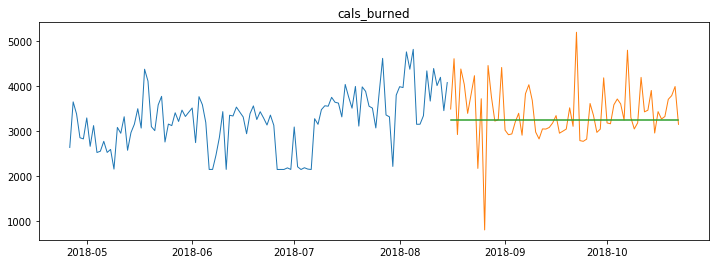

steps -- RMSE: 5325


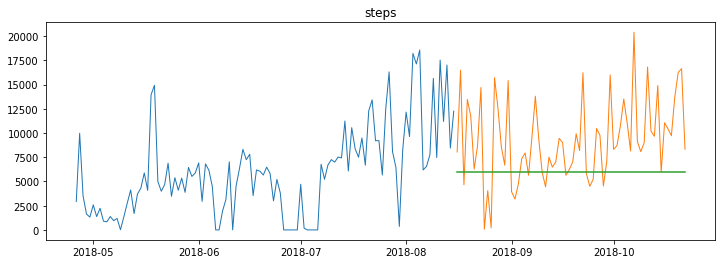

dist -- RMSE: 3


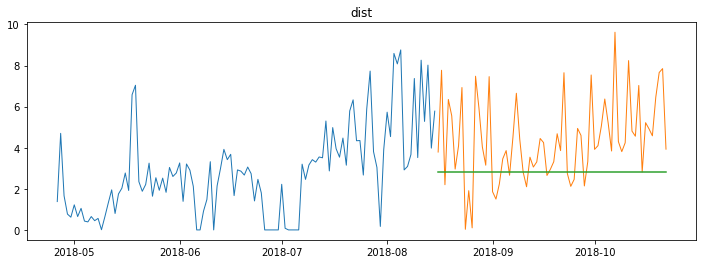

floors -- RMSE: 31


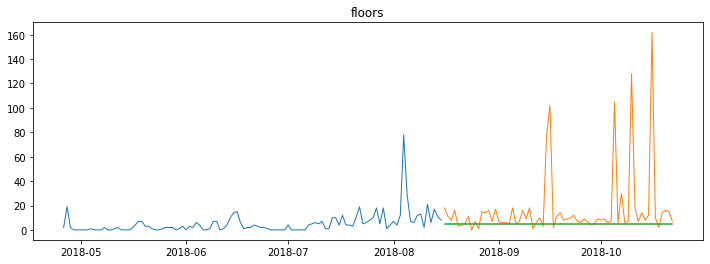

mins_sedentary -- RMSE: 232


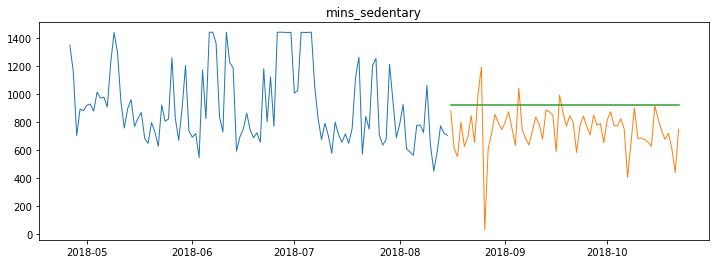

mins_lightly_active -- RMSE: 67


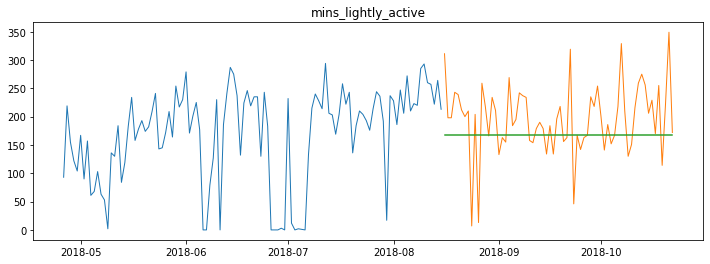

mins_fairly_active -- RMSE: 16


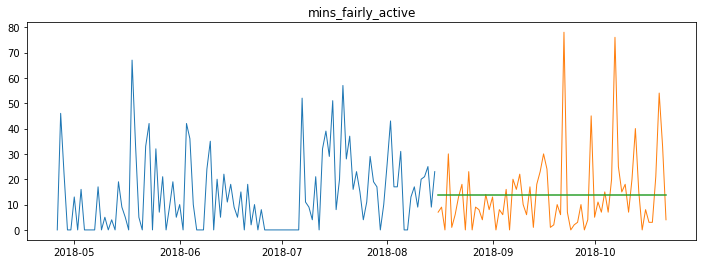

mins_very_active -- RMSE: 39


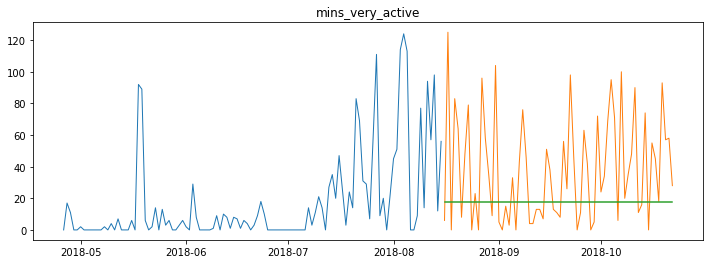

activity_cals -- RMSE: 740


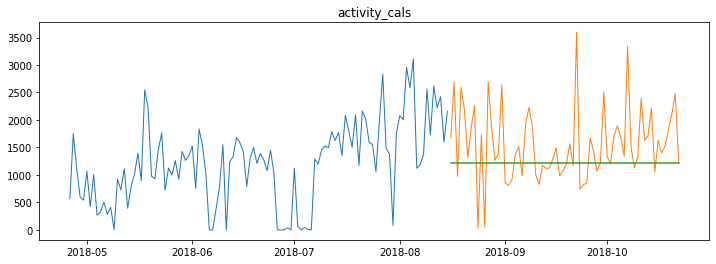

In [37]:
for col in validate.columns:
    plot_and_eval(col)

In [38]:
for col in validate.columns:
    eval_df = append_eval_df('baseline', col)

In [39]:
eval_df

model_type           target_var     rmse
0   baseline          cals_burned   653.24
1   baseline                steps  5324.54
2   baseline                 dist     2.53
3   baseline               floors    31.40
4   baseline       mins_sedentary   232.12
5   baseline  mins_lightly_active    67.18
6   baseline   mins_fairly_active    15.62
7   baseline     mins_very_active    38.87
8   baseline        activity_cals   740.03

### Moving Average

In [40]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

In [41]:
cals_burned = round(train['cals_burned'].rolling(period).mean().iloc[-1], 2)

steps = round(train['steps'].rolling(period).mean().iloc[-1], 2)

dist = round(train['dist'].rolling(period).mean().iloc[-1], 2)

floors = round(train['floors'].rolling(period).mean().iloc[-1], 2)

mins_sedentary = round(train['mins_sedentary'].rolling(period).mean().iloc[-1], 2)

mins_lightly_active = round(train['mins_lightly_active'].rolling(period).mean().iloc[-1], 2)

mins_fairly_active = round(train['mins_fairly_active'].rolling(period).mean().iloc[-1], 2)

mins_very_active = round(train['mins_very_active'].rolling(period).mean().iloc[-1], 2)

activity_cals = round(train['activity_cals'].rolling(period).mean().iloc[-1], 2)

In [42]:
yhat_df = pd.DataFrame({'cals_burned': [cals_burned],
                        'steps': [steps],
                        'dist': [dist],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_lightly_active': [mins_lightly_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_cals': [activity_cals]
                           }, index = validate.index)
yhat_df.head(3)

cals_burned     steps  dist  floors  mins_sedentary  \
date                                                              
2018-08-16      3774.33  10650.63  5.02    12.0           797.2   
2018-08-17      3774.33  10650.63  5.02    12.0           797.2   
2018-08-18      3774.33  10650.63  5.02    12.0           797.2   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
date                                                                    
2018-08-16                218.4               18.83             45.63   
2018-08-17                218.4               18.83             45.63   
2018-08-18                218.4               18.83             45.63   

            activity_cals  
date                       
2018-08-16        1872.93  
2018-08-17        1872.93  
2018-08-18        1872.93

In [43]:
for col in validate.columns:
    print(col, 'rmse')
    print(evaluate(col),'\n')

cals_burned rmse
730.25 

steps rmse
4401.45 

dist rmse
2.09 

floors rmse
29.51 

mins_sedentary rmse
164.58 

mins_lightly_active rmse
65.54 

mins_fairly_active rmse
16.33 

mins_very_active rmse
33.95 

activity_cals rmse
734.64 



cals_burned -- RMSE: 730


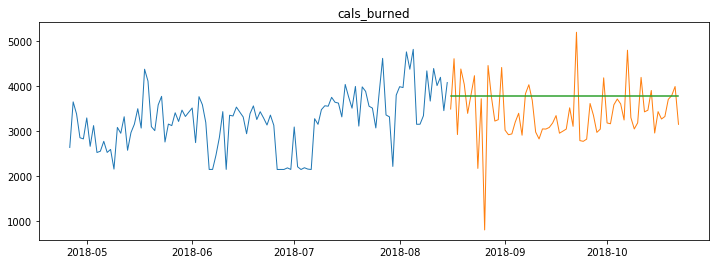

steps -- RMSE: 4401


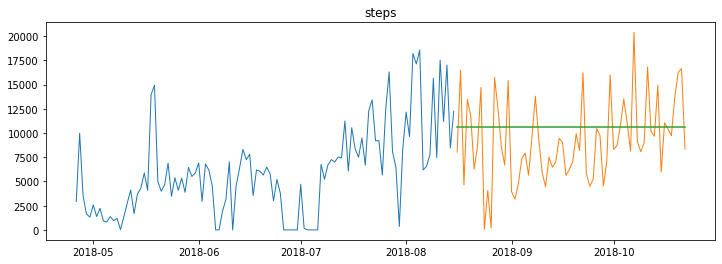

dist -- RMSE: 2


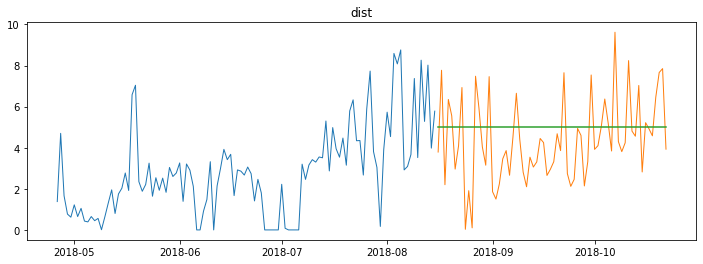

floors -- RMSE: 30


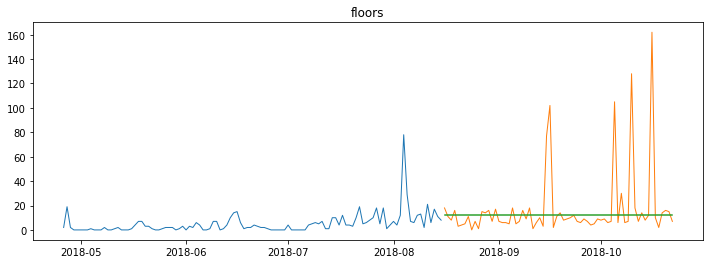

mins_sedentary -- RMSE: 165


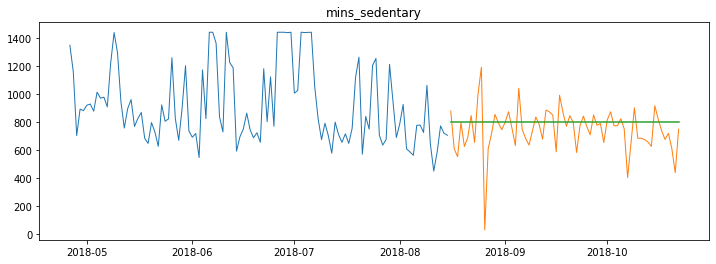

mins_lightly_active -- RMSE: 66


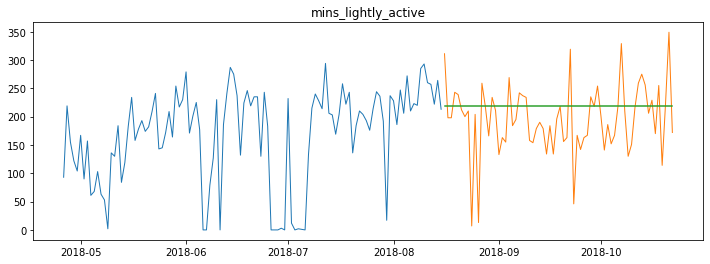

mins_fairly_active -- RMSE: 16


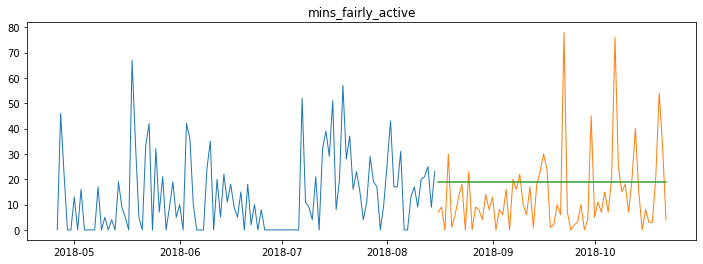

mins_very_active -- RMSE: 34


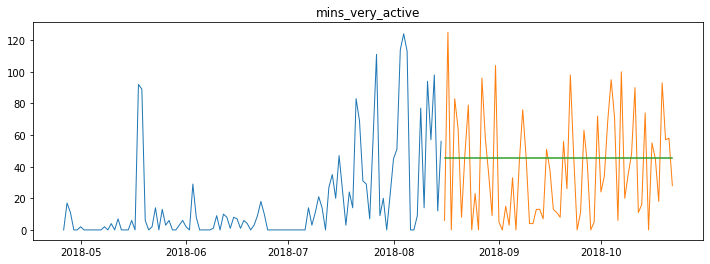

activity_cals -- RMSE: 735


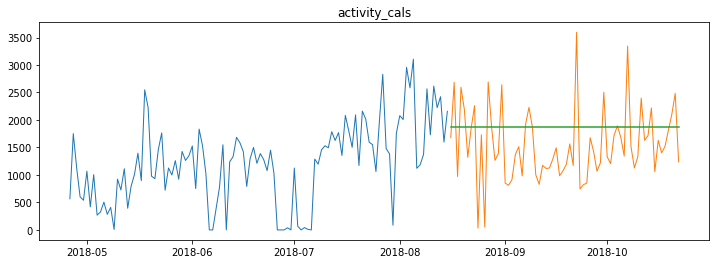

In [44]:
for col in validate.columns:
    plot_and_eval(col)

In [45]:
for col in train.columns:
    eval_df = append_eval_df('30_day_rolling', col)

In [46]:
eval_df

model_type           target_var     rmse
0         baseline          cals_burned   653.24
1         baseline                steps  5324.54
2         baseline                 dist     2.53
3         baseline               floors    31.40
4         baseline       mins_sedentary   232.12
5         baseline  mins_lightly_active    67.18
6         baseline   mins_fairly_active    15.62
7         baseline     mins_very_active    38.87
8         baseline        activity_cals   740.03
9   30_day_rolling          cals_burned   730.25
10  30_day_rolling                steps  4401.45
11  30_day_rolling                 dist     2.09
12  30_day_rolling               floors    29.51
13  30_day_rolling       mins_sedentary   164.58
14  30_day_rolling  mins_lightly_active    65.54
15  30_day_rolling   mins_fairly_active    16.33
16  30_day_rolling     mins_very_active    33.95
17  30_day_rolling        activity_cals   734.64

In [47]:
# compute a 7 day rolling average, 
# use the most recent/last 7 day period value to predict forward. 

period = 7

In [48]:
cals_burned = round(train['cals_burned'].rolling(period).mean().iloc[-1], 2)

steps = round(train['steps'].rolling(period).mean().iloc[-1], 2)

dist = round(train['dist'].rolling(period).mean().iloc[-1], 2)

floors = round(train['floors'].rolling(period).mean().iloc[-1], 2)

mins_sedentary = round(train['mins_sedentary'].rolling(period).mean().iloc[-1], 2)

mins_lightly_active = round(train['mins_lightly_active'].rolling(period).mean().iloc[-1], 2)

mins_fairly_active = round(train['mins_fairly_active'].rolling(period).mean().iloc[-1], 2)

mins_very_active = round(train['mins_very_active'].rolling(period).mean().iloc[-1], 2)

activity_cals = round(train['activity_cals'].rolling(period).mean().iloc[-1], 2)

In [49]:
yhat_df = pd.DataFrame({'cals_burned': [cals_burned],
                        'steps': [steps],
                        'dist': [dist],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_lightly_active': [mins_lightly_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_cals': [activity_cals]
                           }, index = validate.index)
yhat_df.head(3)

cals_burned     steps  dist  floors  mins_sedentary  \
date                                                              
2018-08-16      4019.71  12791.14  6.03   11.14          704.14   
2018-08-17      4019.71  12791.14  6.03   11.14          704.14   
2018-08-18      4019.71  12791.14  6.03   11.14          704.14   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
date                                                                    
2018-08-16               256.29               17.71             58.29   
2018-08-17               256.29               17.71             58.29   
2018-08-18               256.29               17.71             58.29   

            activity_cals  
date                       
2018-08-16         2188.0  
2018-08-17         2188.0  
2018-08-18         2188.0

In [50]:
for col in validate.columns:
    print(col, 'rmse')
    print(evaluate(col),'\n')

cals_burned rmse
878.91 

steps rmse
5467.2 

dist rmse
2.58 

floors rmse
29.67 

mins_sedentary rmse
161.45 

mins_lightly_active rmse
86.36 

mins_fairly_active rmse
16.04 

mins_very_active rmse
38.79 

activity_cals rmse
918.21 



In [51]:
for col in validate.columns:
    eval_df = append_eval_df('7_day_rolling', col)

In [52]:
eval_df

model_type           target_var     rmse
0         baseline          cals_burned   653.24
1         baseline                steps  5324.54
2         baseline                 dist     2.53
3         baseline               floors    31.40
4         baseline       mins_sedentary   232.12
5         baseline  mins_lightly_active    67.18
6         baseline   mins_fairly_active    15.62
7         baseline     mins_very_active    38.87
8         baseline        activity_cals   740.03
9   30_day_rolling          cals_burned   730.25
10  30_day_rolling                steps  4401.45
11  30_day_rolling                 dist     2.09
12  30_day_rolling               floors    29.51
13  30_day_rolling       mins_sedentary   164.58
14  30_day_rolling  mins_lightly_active    65.54
15  30_day_rolling   mins_fairly_active    16.33
16  30_day_rolling     mins_very_active    33.95
17  30_day_rolling        activity_cals   734.64
18   7_day_rolling          cals_burned   878.91
19   7_day_rolling                steps  5467.20
20   7_day_rolling                 dist     2.58
21   7_day_rolling               floors    29.67
22   7_day_rolling       mins_sedentary   161.45
23   7_day_rolling  mins_lightly_active    86.36
24   7_day_rolling   mins_fairly_active    16.04
25   7_day_rolling     mins_very_active    38.79
26   7_day_rolling        activity_cals   918.21

### Holt's Linear Trend

cals_burned 



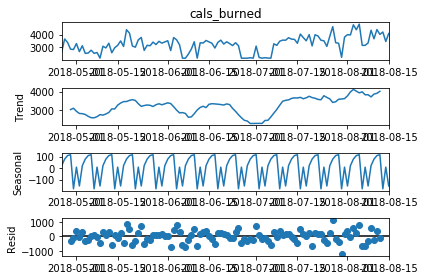

steps 



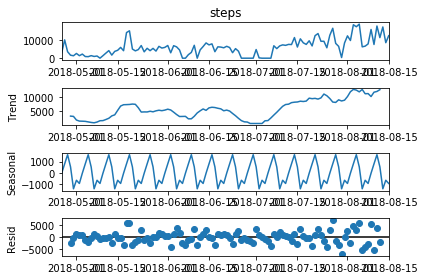

dist 



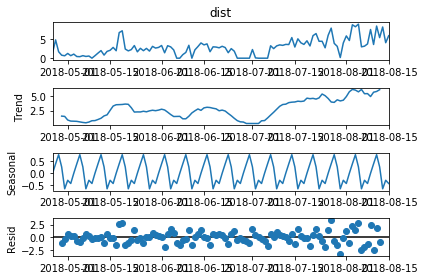

floors 



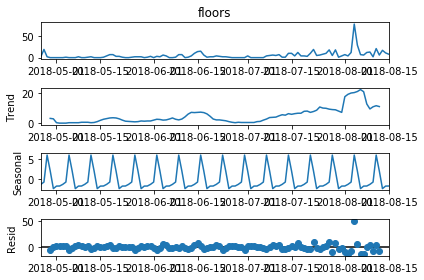

mins_sedentary 



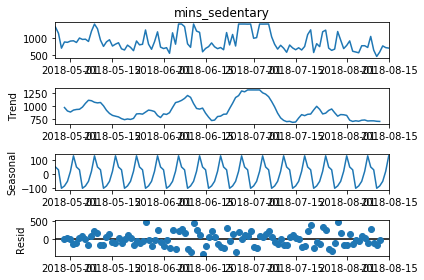

mins_lightly_active 



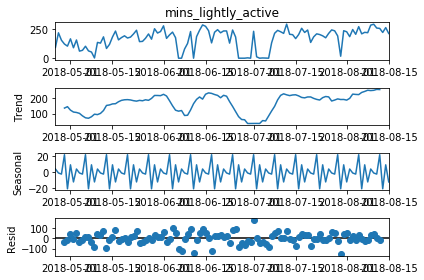

mins_fairly_active 



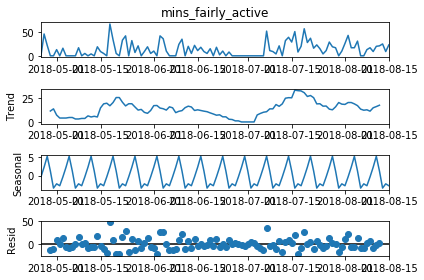

mins_very_active 



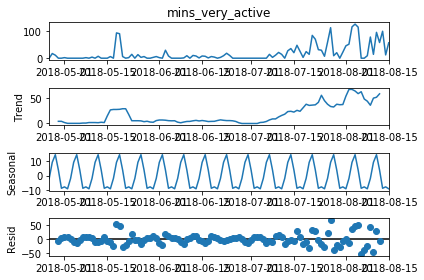

activity_cals 



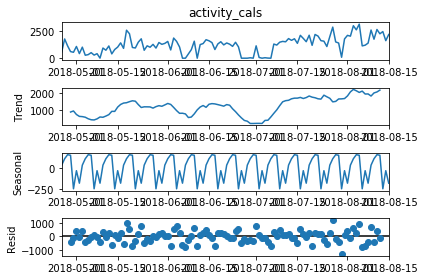

In [53]:
for col in train.columns:
    print(col,'\n')
    _ = sm.tsa.seasonal_decompose(train[col].resample('D').mean()).plot()
    plt.show()

In [54]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

cals_burned -- RMSE: 1339


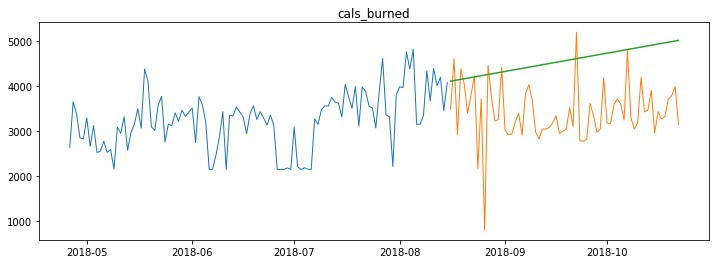

steps -- RMSE: 10008


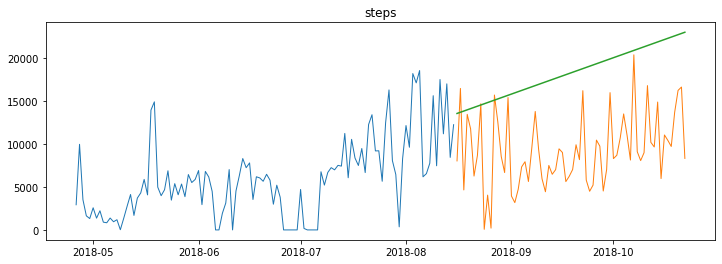

dist -- RMSE: 5


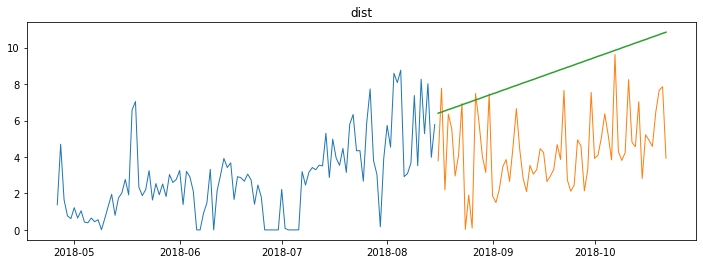

floors -- RMSE: 29


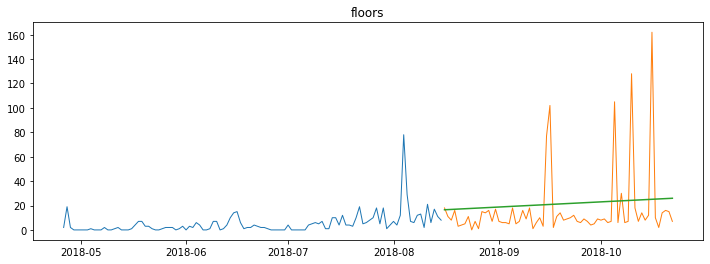

mins_sedentary -- RMSE: 420


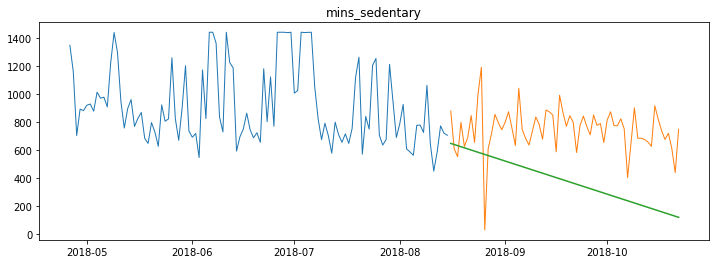

mins_lightly_active -- RMSE: 163


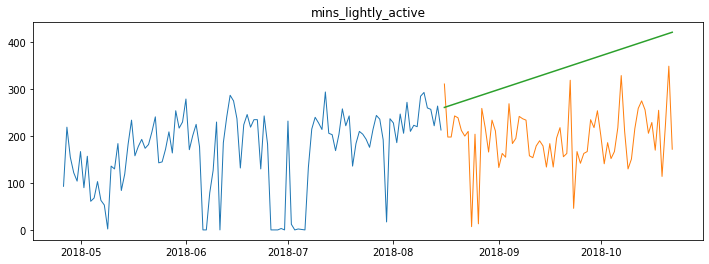

mins_fairly_active -- RMSE: 25


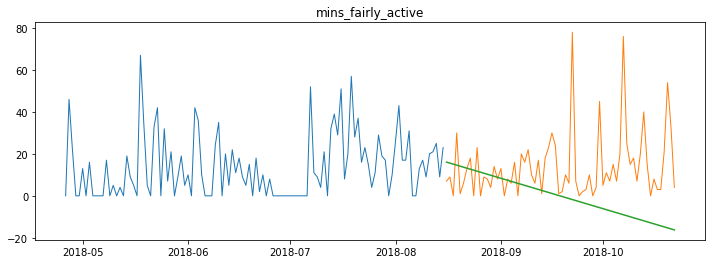

mins_very_active -- RMSE: 65


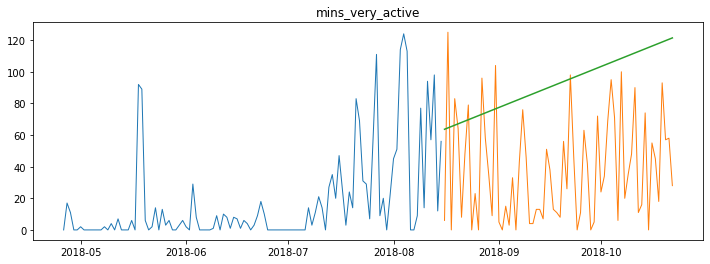

activity_cals -- RMSE: 1516


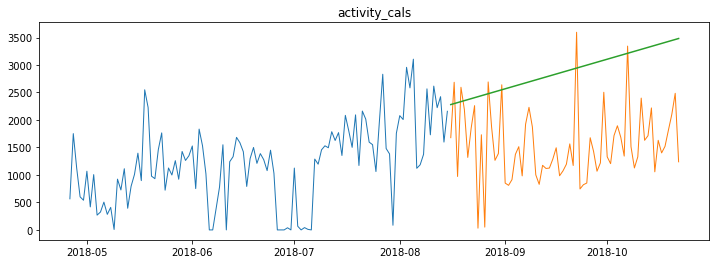

In [55]:
for col in train.columns:
    plot_and_eval(col)

In [56]:
for col in validate.columns:
    eval_df = append_eval_df('holt_1', col)

In [57]:
eval_df

model_type           target_var      rmse
0         baseline          cals_burned    653.24
1         baseline                steps   5324.54
2         baseline                 dist      2.53
3         baseline               floors     31.40
4         baseline       mins_sedentary    232.12
5         baseline  mins_lightly_active     67.18
6         baseline   mins_fairly_active     15.62
7         baseline     mins_very_active     38.87
8         baseline        activity_cals    740.03
9   30_day_rolling          cals_burned    730.25
10  30_day_rolling                steps   4401.45
11  30_day_rolling                 dist      2.09
12  30_day_rolling               floors     29.51
13  30_day_rolling       mins_sedentary    164.58
14  30_day_rolling  mins_lightly_active     65.54
15  30_day_rolling   mins_fairly_active     16.33
16  30_day_rolling     mins_very_active     33.95
17  30_day_rolling        activity_cals    734.64
18   7_day_rolling          cals_burned    878.91
19   7_day_rolling                steps   5467.20
20   7_day_rolling                 dist      2.58
21   7_day_rolling               floors     29.67
22   7_day_rolling       mins_sedentary    161.45
23   7_day_rolling  mins_lightly_active     86.36
24   7_day_rolling   mins_fairly_active     16.04
25   7_day_rolling     mins_very_active     38.79
26   7_day_rolling        activity_cals    918.21
27          holt_1          cals_burned   1339.28
28          holt_1                steps  10008.28
29          holt_1                 dist      4.71
30          holt_1               floors     28.91
31          holt_1       mins_sedentary    420.11
32          holt_1  mins_lightly_active    162.92
33          holt_1   mins_fairly_active     24.54
34          holt_1     mins_very_active     65.16
35          holt_1        activity_cals   1516.09

In [58]:
# optimized holt
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(optimized = True)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

In [59]:
yhat_df

cals_burned     steps  dist  floors  mins_sedentary  \
date                                                              
2018-08-16      3953.40  12361.01  5.79   16.10          700.18   
2018-08-17      3961.67  12459.32  5.83   16.41          700.18   
2018-08-18      3969.94  12557.64  5.86   16.73          700.18   
2018-08-19      3978.20  12655.96  5.90   17.04          700.18   
2018-08-20      3986.47  12754.27  5.93   17.35          700.18   
...                 ...       ...   ...     ...             ...   
2018-10-18      4474.13  18554.90  7.96   35.81          700.18   
2018-10-19      4482.39  18653.22  7.99   36.12          700.18   
2018-10-20      4490.66  18751.53  8.03   36.43          700.18   
2018-10-21      4498.92  18849.85  8.06   36.75          700.18   
2018-10-22      4507.19  18948.16  8.10   37.06          700.18   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
date                                                                    
2018-08-16               235.15               17.73             54.83   
2018-08-17               236.04               17.80             55.31   
2018-08-18               236.94               17.86             55.79   
2018-08-19               237.83               17.92             56.27   
2018-08-20               238.72               17.98             56.75   
...                         ...                 ...               ...   
2018-10-18               291.44               21.69             85.07   
2018-10-19               292.34               21.75             85.55   
2018-10-20               293.23               21.82             86.03   
2018-10-21               294.12               21.88             86.51   
2018-10-22               295.02               21.94             86.99   

            activity_cals  
date                       
2018-08-16        2062.52  
2018-08-17        2065.32  
2018-08-18        2068.12  
2018-08-19        2070.91  
2018-08-20        2073.71  
...                   ...  
2018-10-18        2238.84  
2018-10-19        2241.64  
2018-10-20        2244.44  
2018-10-21        2247.24  
2018-10-22        2250.04  

[68 rows x 9 columns]

In [60]:
for col in validate.columns:
    eval_df = append_eval_df('holt_optimized', col)

In [61]:
eval_df

model_type           target_var      rmse
0         baseline          cals_burned    653.24
1         baseline                steps   5324.54
2         baseline                 dist      2.53
3         baseline               floors     31.40
4         baseline       mins_sedentary    232.12
5         baseline  mins_lightly_active     67.18
6         baseline   mins_fairly_active     15.62
7         baseline     mins_very_active     38.87
8         baseline        activity_cals    740.03
9   30_day_rolling          cals_burned    730.25
10  30_day_rolling                steps   4401.45
11  30_day_rolling                 dist      2.09
12  30_day_rolling               floors     29.51
13  30_day_rolling       mins_sedentary    164.58
14  30_day_rolling  mins_lightly_active     65.54
15  30_day_rolling   mins_fairly_active     16.33
16  30_day_rolling     mins_very_active     33.95
17  30_day_rolling        activity_cals    734.64
18   7_day_rolling          cals_burned    878.91
19   7_day_rolling                steps   5467.20
20   7_day_rolling                 dist      2.58
21   7_day_rolling               floors     29.67
22   7_day_rolling       mins_sedentary    161.45
23   7_day_rolling  mins_lightly_active     86.36
24   7_day_rolling   mins_fairly_active     16.04
25   7_day_rolling     mins_very_active     38.79
26   7_day_rolling        activity_cals    918.21
27          holt_1          cals_burned   1339.28
28          holt_1                steps  10008.28
29          holt_1                 dist      4.71
30          holt_1               floors     28.91
31          holt_1       mins_sedentary    420.11
32          holt_1  mins_lightly_active    162.92
33          holt_1   mins_fairly_active     24.54
34          holt_1     mins_very_active     65.16
35          holt_1        activity_cals   1516.09
36  holt_optimized          cals_burned   1046.06
37  holt_optimized                steps   7580.92
38  holt_optimized                 dist      3.20
39  holt_optimized               floors     29.94
40  holt_optimized       mins_sedentary    162.50
41  holt_optimized  mins_lightly_active     93.12
42  holt_optimized   mins_fairly_active     16.43
43  holt_optimized     mins_very_active     46.97
44  holt_optimized        activity_cals    895.06

Models for each column that performed best on train
- cals_burned = simple_average "baseline" 653.24
- steps = 30_day_rolling 4,401.45
- dist = 30_day_rolling 2.09
- floors = holt_1 28.91
- mins_sedentary = 7_day_rolling 161.45
- mins_lightly_active = 30_day_rolling 65.54
- mins_fairly_active = simple_average "baseline" 15.62
- mins_very_active = 30_day_rolling 33.95
- activity_cals = 30_day_rolling 734.64

## Evaluating Each Model on Test

In [62]:
# combine train and validate
train_validate = df[:validate_end_index]

In [63]:
# functions for test
# evaluation function to compute rmse
def evaluate_test(target_var):
    '''Calculate root mean squared error of dataframe (train, validate, or test)
    against create yhat df. Returns the rmse.'''
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df_test[target_var])), 2)
    return rmse

# plot and evaluate 
def plot_and_eval(target_var):
    '''Plot the train target variable and the predicted train yhat. 
    Prints the plot and rmse'''
    
    plt.figure(figsize = (12,4))
    plt.plot(train_validate[target_var], label = 'Train', linewidth = 1)
    plt.plot(test[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df_test[target_var])
    plt.title(target_var)
    
    rmse = evaluate_test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
    
# Create the empty dataframe
eval_test_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_test_df(model_type, target_var):
    rmse = evaluate_test(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_test_df.append(d, ignore_index = True)

Simple Average

In [64]:
cals_burned = round(train_validate['cals_burned'].mean(), 2)

steps = round(train_validate['steps'].mean(), 2)

dist = round(train_validate['dist'].mean(), 2)

floors = round(train_validate['floors'].mean(), 2)

mins_sedentary = round(train_validate['mins_sedentary'].mean(), 2)

mins_lightly_active = round(train_validate['mins_lightly_active'].mean(), 2)

mins_fairly_active = round(train_validate['mins_fairly_active'].mean(), 2)

mins_very_active = round(train_validate['mins_very_active'].mean(), 2)

activity_cals = round(train_validate['activity_cals'].mean(), 2)

In [65]:
yhat_df_test = pd.DataFrame({'cals_burned': [cals_burned],
                        'steps': [steps],
                        'dist': [dist],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_lightly_active': [mins_lightly_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_cals': [activity_cals]
                           }, index = test.index)

In [66]:
for col in validate.columns:
    eval_test_df = append_eval_test_df('baseline', col)

cals_burned -- RMSE: 639


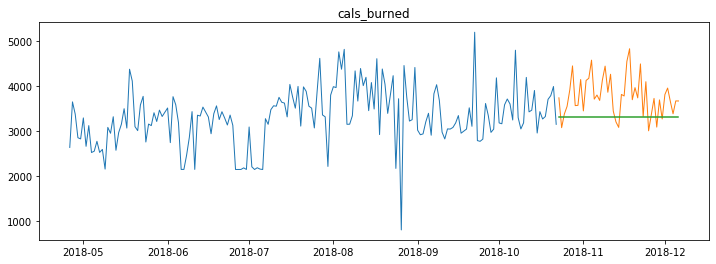

steps -- RMSE: 7597


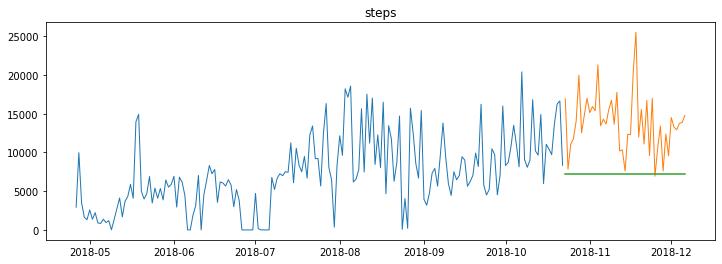

dist -- RMSE: 4


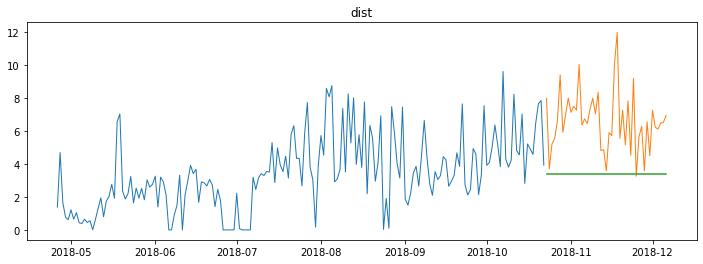

floors -- RMSE: 42


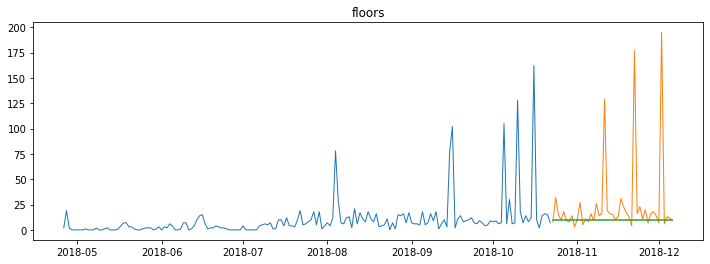

mins_sedentary -- RMSE: 232


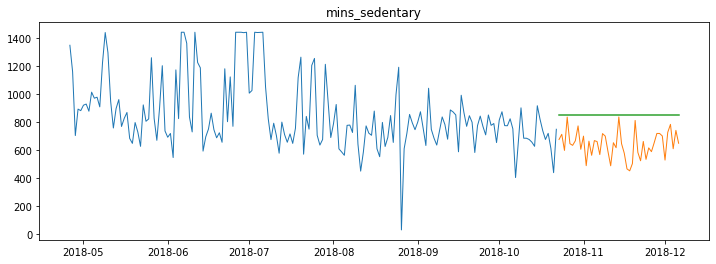

mins_lightly_active -- RMSE: 69


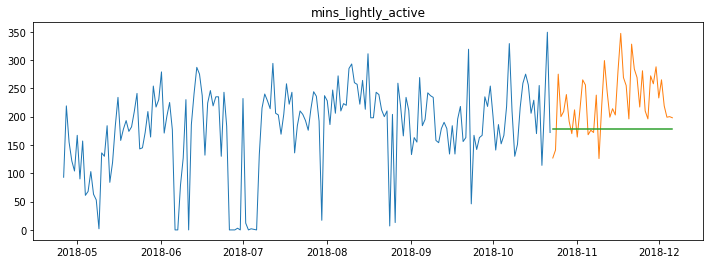

mins_fairly_active -- RMSE: 16


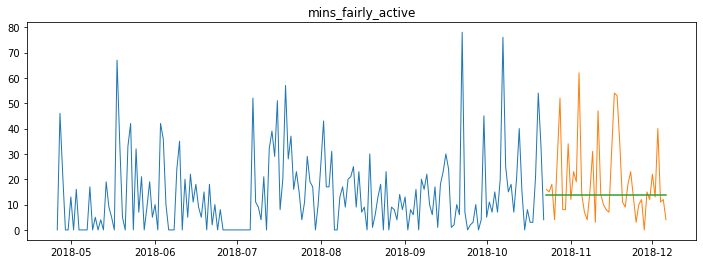

mins_very_active -- RMSE: 55


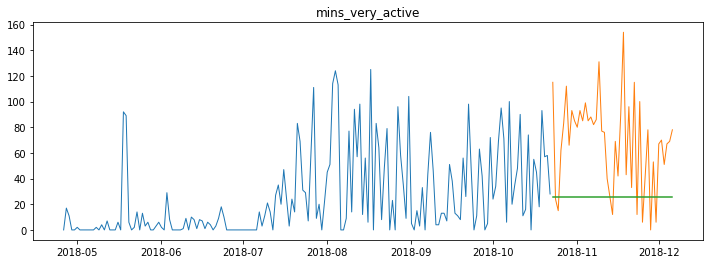

activity_cals -- RMSE: 876


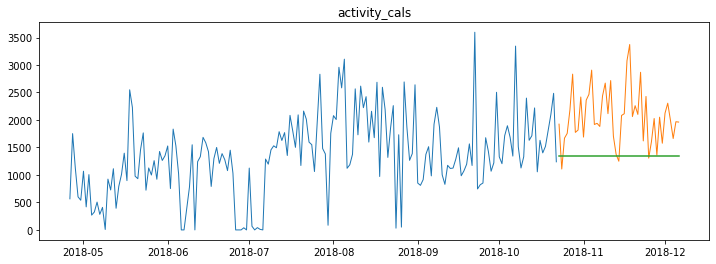

In [67]:
for col in validate.columns:
    plot_and_eval(col)

Monthly Rolling Average

In [68]:
# setting rolling average to 30 days
period = 30

cals_burned = round(train_validate['cals_burned'].rolling(period).mean().iloc[-1], 2)

steps = round(train_validate['steps'].rolling(period).mean().iloc[-1], 2)

dist = round(train_validate['dist'].rolling(period).mean().iloc[-1], 2)

floors = round(train_validate['floors'].rolling(period).mean().iloc[-1], 2)

mins_sedentary = round(train_validate['mins_sedentary'].rolling(period).mean().iloc[-1], 2)

mins_lightly_active = round(train_validate['mins_lightly_active'].rolling(period).mean().iloc[-1], 2)

mins_fairly_active = round(train_validate['mins_fairly_active'].rolling(period).mean().iloc[-1], 2)

mins_very_active = round(train_validate['mins_very_active'].rolling(period).mean().iloc[-1], 2)

activity_cals = round(train_validate['activity_cals'].rolling(period).mean().iloc[-1], 2)

In [69]:
yhat_df_test = pd.DataFrame({'cals_burned': [cals_burned],
                        'steps': [steps],
                        'dist': [dist],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_lightly_active': [mins_lightly_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_cals': [activity_cals]
                           }, index = test.index)
yhat_df.head(3)

cals_burned     steps  dist  floors  mins_sedentary  \
date                                                              
2018-08-16      3953.40  12361.01  5.79   16.10          700.18   
2018-08-17      3961.67  12459.32  5.83   16.41          700.18   
2018-08-18      3969.94  12557.64  5.86   16.73          700.18   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
date                                                                    
2018-08-16               235.15               17.73             54.83   
2018-08-17               236.04               17.80             55.31   
2018-08-18               236.94               17.86             55.79   

            activity_cals  
date                       
2018-08-16        2062.52  
2018-08-17        2065.32  
2018-08-18        2068.12

cals_burned -- RMSE: 555


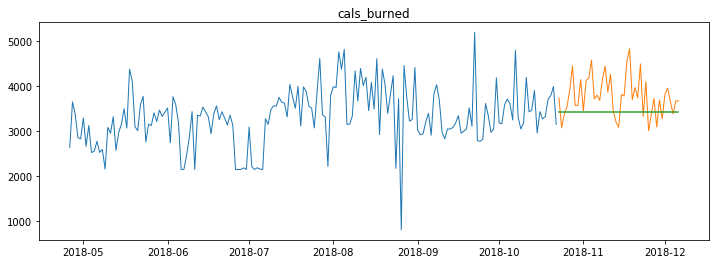

steps -- RMSE: 5012


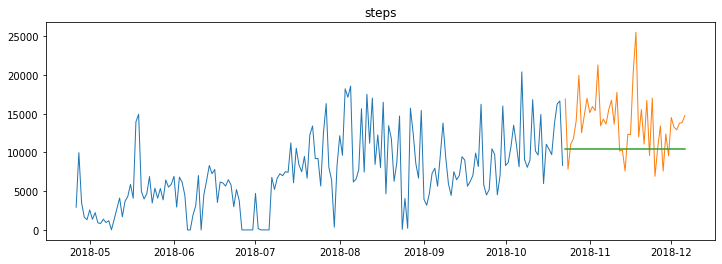

dist -- RMSE: 2


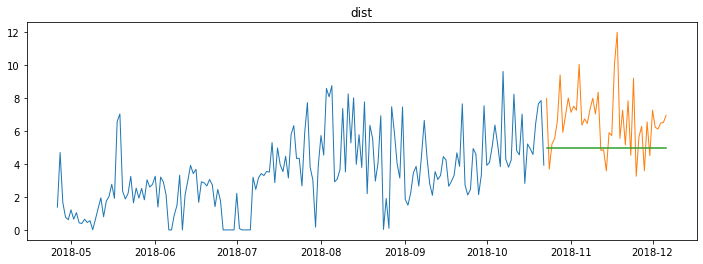

floors -- RMSE: 39


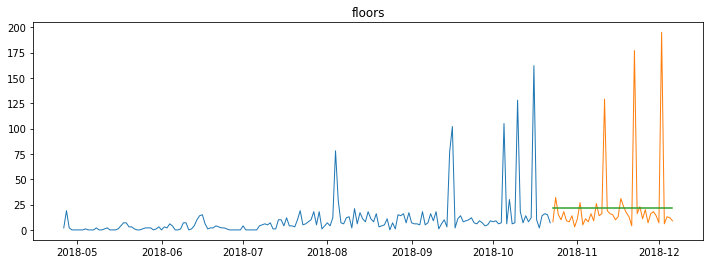

mins_sedentary -- RMSE: 130


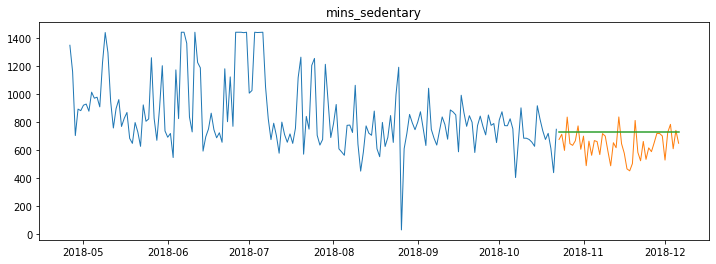

mins_lightly_active -- RMSE: 56


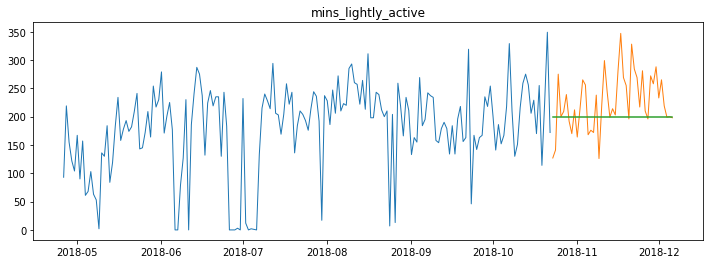

mins_fairly_active -- RMSE: 16


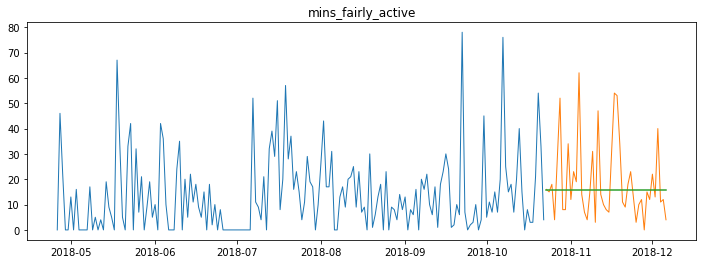

mins_very_active -- RMSE: 43


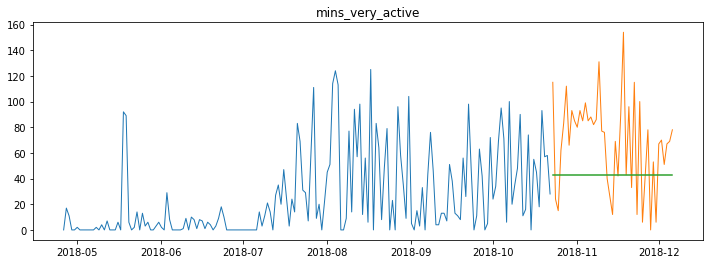

activity_cals -- RMSE: 676


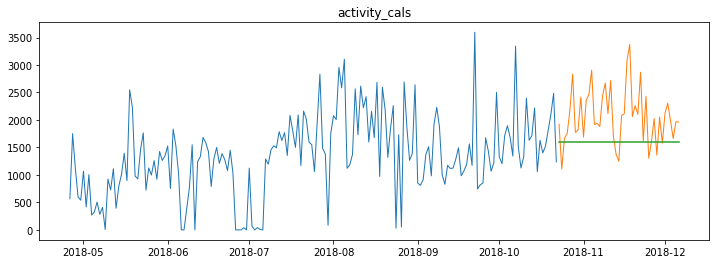

In [70]:
for col in validate.columns:
    plot_and_eval(col)

In [71]:
for col in test.columns:
    eval_test_df = append_eval_test_df('30_day_rolling', col)

Weekly Rolling Average

In [72]:
# setting rolling average to 30 days
period = 7

cals_burned = round(train_validate['cals_burned'].rolling(period).mean().iloc[-1], 2)

steps = round(train_validate['steps'].rolling(period).mean().iloc[-1], 2)

dist = round(train_validate['dist'].rolling(period).mean().iloc[-1], 2)

floors = round(train_validate['floors'].rolling(period).mean().iloc[-1], 2)

mins_sedentary = round(train_validate['mins_sedentary'].rolling(period).mean().iloc[-1], 2)

mins_lightly_active = round(train_validate['mins_lightly_active'].rolling(period).mean().iloc[-1], 2)

mins_fairly_active = round(train_validate['mins_fairly_active'].rolling(period).mean().iloc[-1], 2)

mins_very_active = round(train_validate['mins_very_active'].rolling(period).mean().iloc[-1], 2)

activity_cals = round(train_validate['activity_cals'].rolling(period).mean().iloc[-1], 2)

In [73]:
yhat_df_test = pd.DataFrame({'cals_burned': [cals_burned],
                        'steps': [steps],
                        'dist': [dist],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_lightly_active': [mins_lightly_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_cals': [activity_cals]
                           }, index = test.index)
yhat_df.head(3)

cals_burned     steps  dist  floors  mins_sedentary  \
date                                                              
2018-08-16      3953.40  12361.01  5.79   16.10          700.18   
2018-08-17      3961.67  12459.32  5.83   16.41          700.18   
2018-08-18      3969.94  12557.64  5.86   16.73          700.18   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
date                                                                    
2018-08-16               235.15               17.73             54.83   
2018-08-17               236.04               17.80             55.31   
2018-08-18               236.94               17.86             55.79   

            activity_cals  
date                       
2018-08-16        2062.52  
2018-08-17        2065.32  
2018-08-18        2068.12

In [74]:
for col in test.columns:
    eval_test_df = append_eval_test_df('7_day_rolling', col)

cals_burned -- RMSE: 503


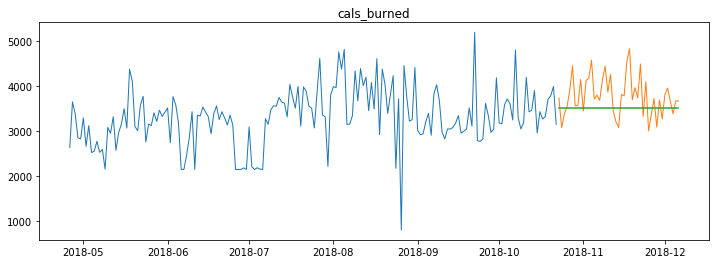

steps -- RMSE: 4012


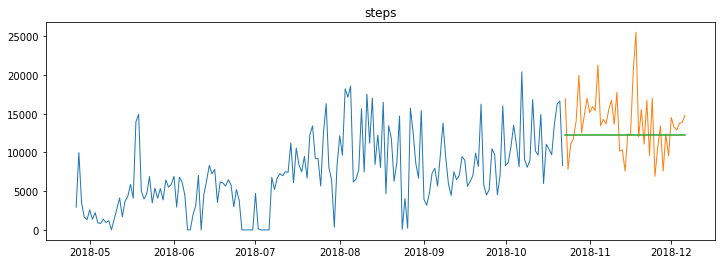

dist -- RMSE: 2


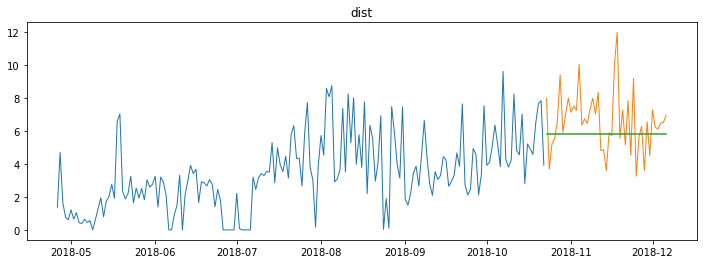

floors -- RMSE: 40


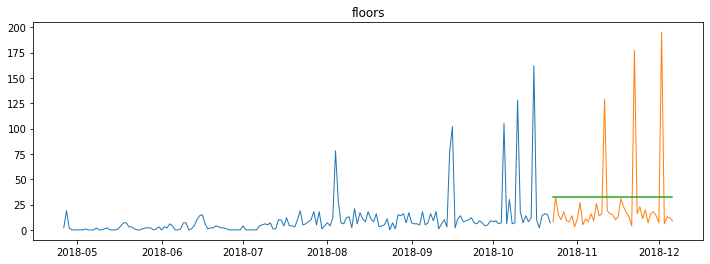

mins_sedentary -- RMSE: 101


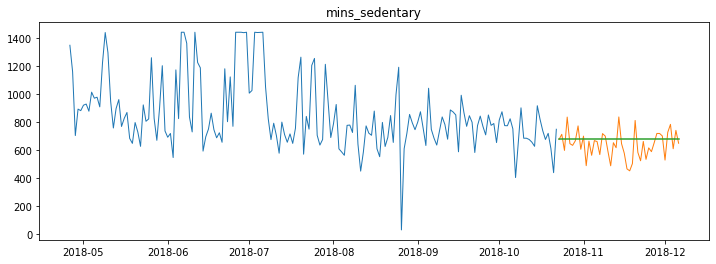

mins_lightly_active -- RMSE: 50


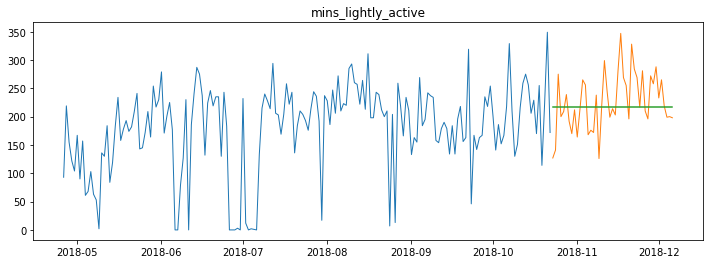

mins_fairly_active -- RMSE: 15


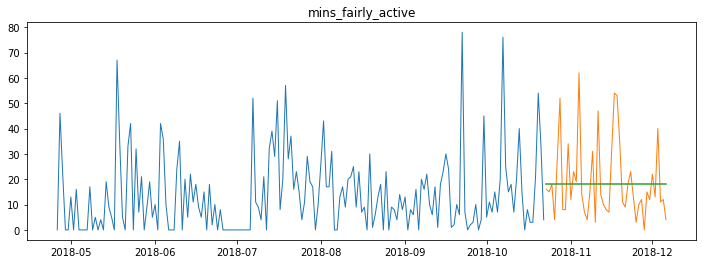

mins_very_active -- RMSE: 39


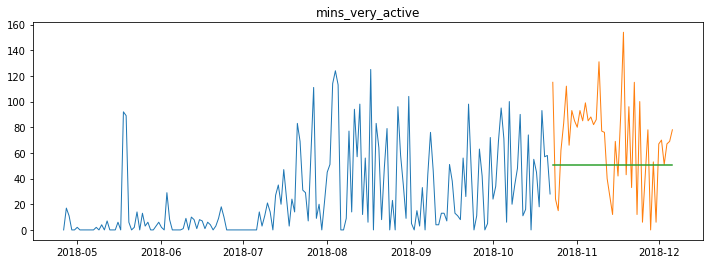

activity_cals -- RMSE: 589


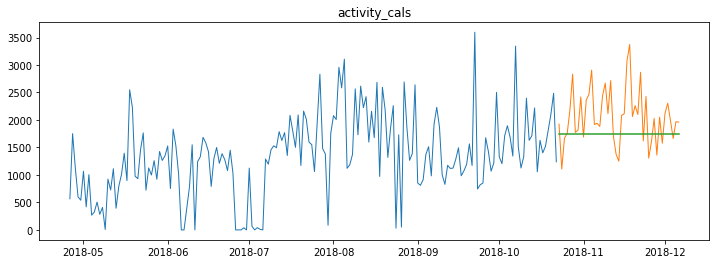

In [75]:
for col in validate.columns:
    plot_and_eval(col)

Holt .1

cals_burned 



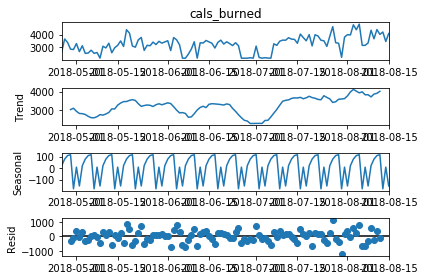

steps 



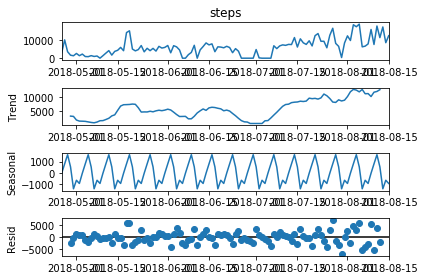

dist 



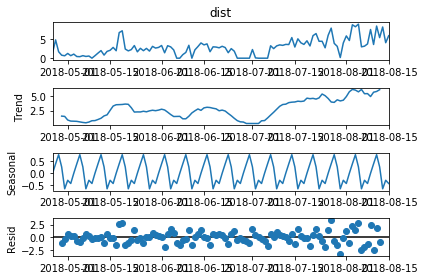

floors 



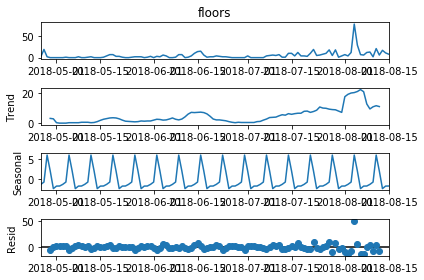

mins_sedentary 



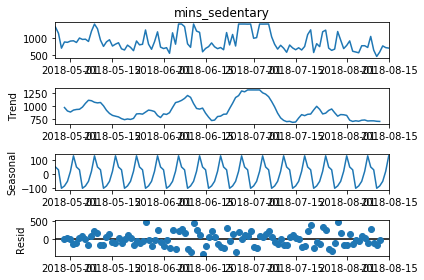

mins_lightly_active 



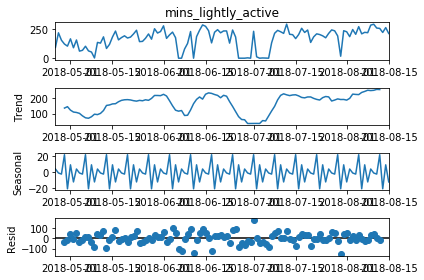

mins_fairly_active 



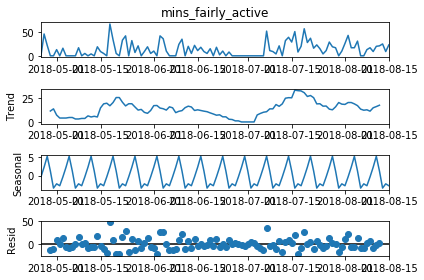

mins_very_active 



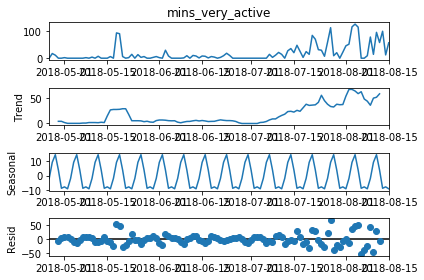

activity_cals 



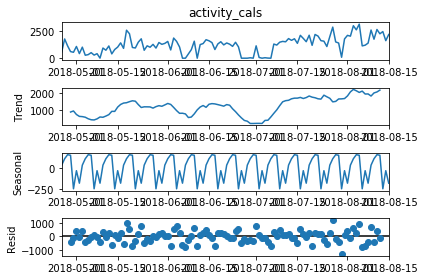

In [76]:
for col in test.columns:
    print(col,'\n')
    _ = sm.tsa.seasonal_decompose(train[col].resample('D').mean()).plot()
    plt.show()

In [77]:
for col in validate.columns:
    model = Holt(train_validate[col], exponential = False)
    
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    
    yhat_items = model.predict(start = test.index[0], end = test.index[-1])
    
    yhat_df_test[col] = round(yhat_items, 2)

In [78]:
for col in test.columns:
    eval_test_df = append_eval_test_df('holt_1', col)

cals_burned -- RMSE: 483


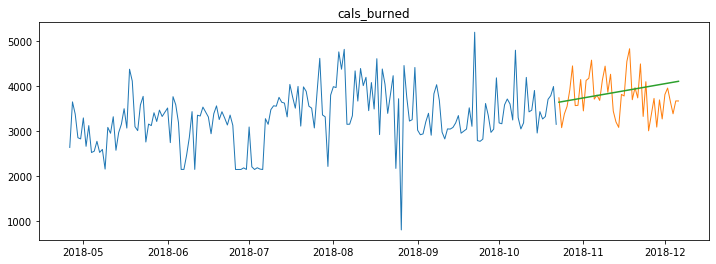

steps -- RMSE: 5579


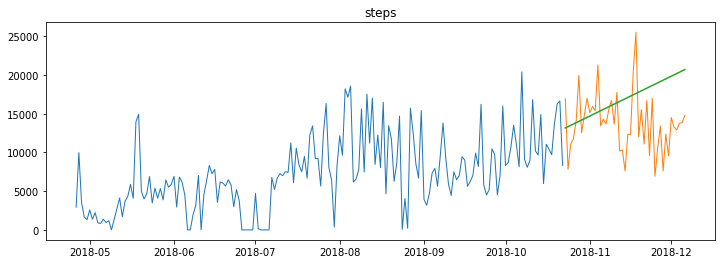

dist -- RMSE: 3


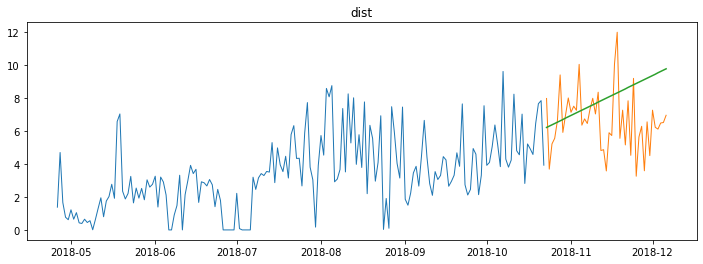

floors -- RMSE: 41


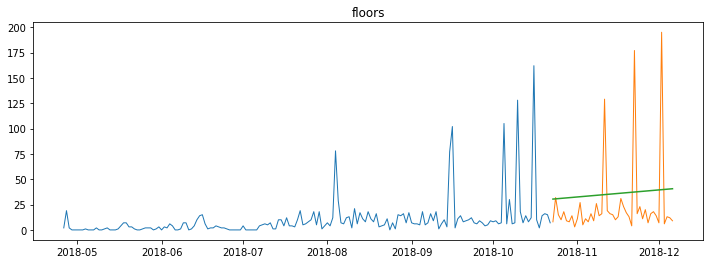

mins_sedentary -- RMSE: 163


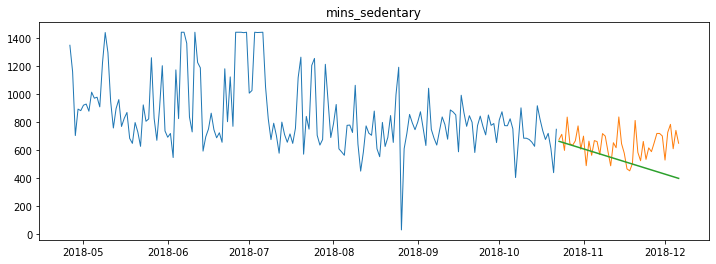

mins_lightly_active -- RMSE: 71


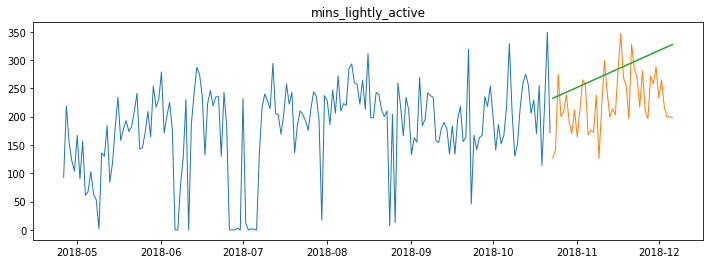

mins_fairly_active -- RMSE: 16


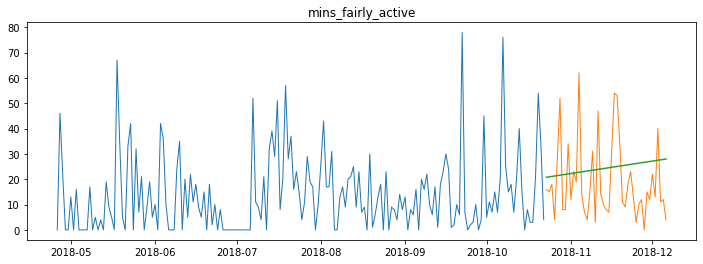

mins_very_active -- RMSE: 37


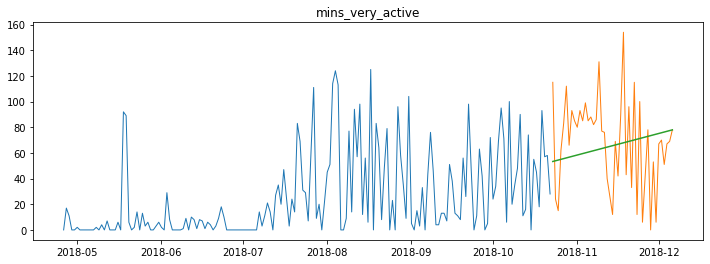

activity_cals -- RMSE: 578


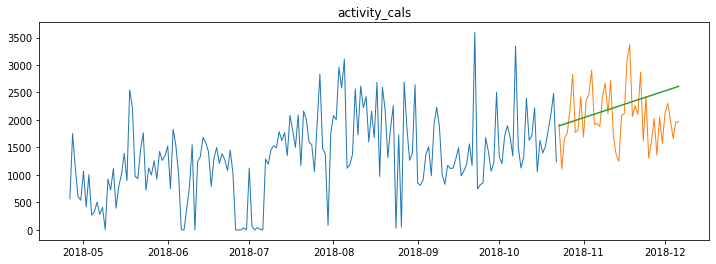

In [79]:
for col in train.columns:
    plot_and_eval(col)

Holt Optimized

In [80]:
for col in validate.columns:
    model = Holt(train_validate[col], exponential = False)
    
    model = model.fit(optimized = True)
    
    yhat_items = model.predict(start = test.index[0], end = test.index[-1])
    
    yhat_df_test[col] = round(yhat_items, 2)

In [81]:
for col in test.columns:
    eval_test_df = append_eval_test_df('holt_optimized', col)

cals_burned -- RMSE: 471


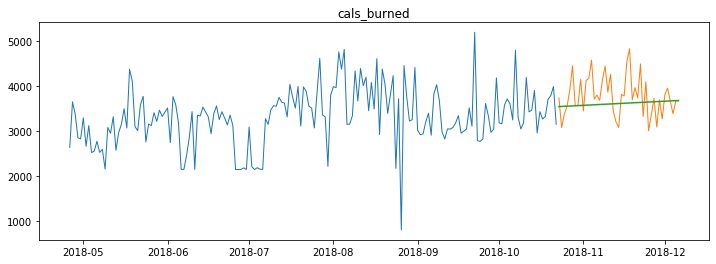

steps -- RMSE: 3895


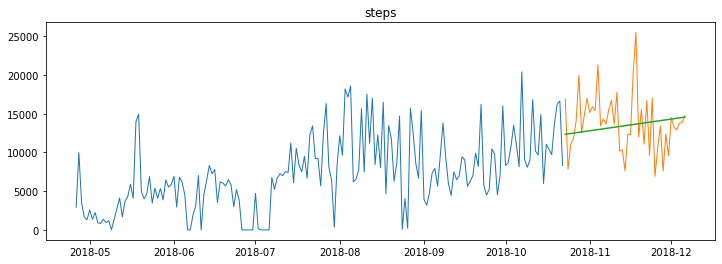

dist -- RMSE: 2


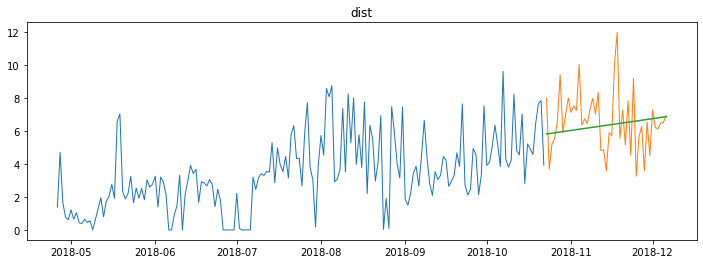

floors -- RMSE: 39


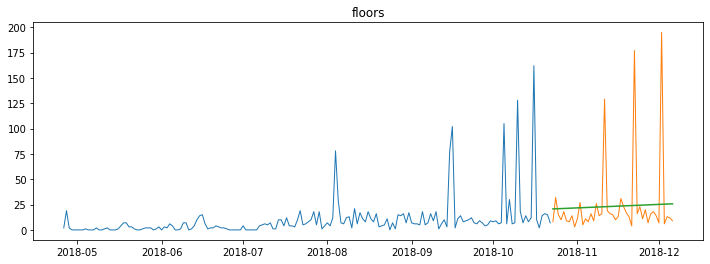

mins_sedentary -- RMSE: 95


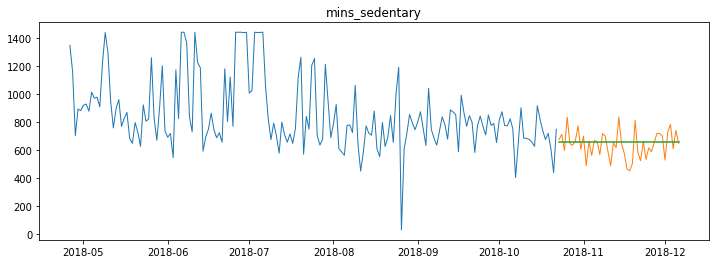

mins_lightly_active -- RMSE: 48


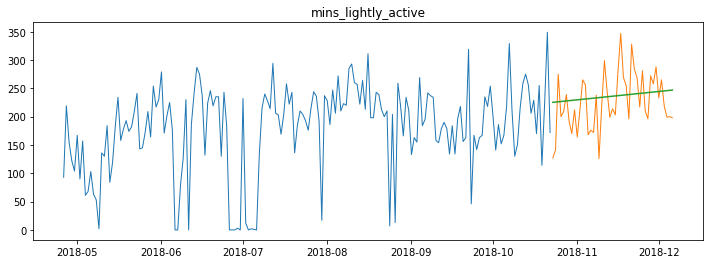

mins_fairly_active -- RMSE: 15


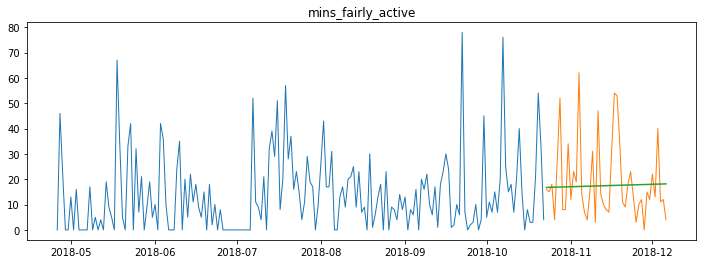

mins_very_active -- RMSE: 39


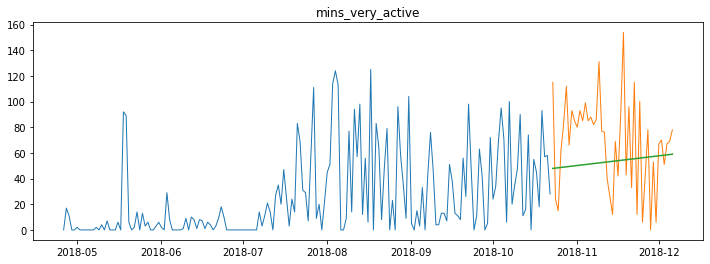

activity_cals -- RMSE: 529


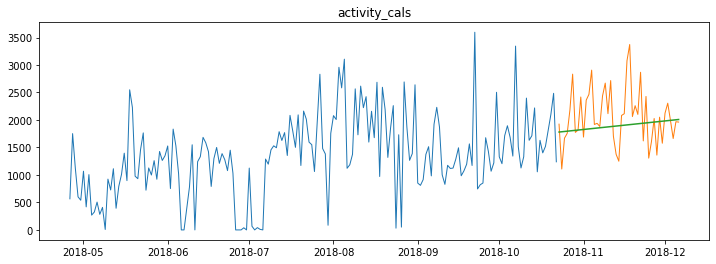

In [82]:
for col in train.columns:
    plot_and_eval(col)

In [83]:
eval_df['rmse_test'] = eval_test_df.rmse

In [84]:
eval_df.sort_values('target_var')

model_type           target_var      rmse  rmse_test
44  holt_optimized        activity_cals    895.06     528.71
35          holt_1        activity_cals   1516.09     578.00
26   7_day_rolling        activity_cals    918.21     588.89
17  30_day_rolling        activity_cals    734.64     676.45
8         baseline        activity_cals    740.03     875.50
36  holt_optimized          cals_burned   1046.06     471.29
27          holt_1          cals_burned   1339.28     483.00
18   7_day_rolling          cals_burned    878.91     503.32
9   30_day_rolling          cals_burned    730.25     554.64
0         baseline          cals_burned    653.24     638.71
20   7_day_rolling                 dist      2.58       1.96
11  30_day_rolling                 dist      2.09       2.44
2         baseline                 dist      2.53       3.67
38  holt_optimized                 dist      3.20       1.87
29          holt_1                 dist      4.71       2.60
39  holt_optimized               floors     29.94      39.14
21   7_day_rolling               floors     29.67      40.16
3         baseline               floors     31.40      41.99
12  30_day_rolling               floors     29.51      39.43
30          holt_1               floors     28.91      40.52
15  30_day_rolling   mins_fairly_active     16.33      15.51
24   7_day_rolling   mins_fairly_active     16.04      15.22
42  holt_optimized   mins_fairly_active     16.43      15.33
33          holt_1   mins_fairly_active     24.54      16.49
6         baseline   mins_fairly_active     15.62      16.05
5         baseline  mins_lightly_active     67.18      68.57
41  holt_optimized  mins_lightly_active     93.12      48.44
14  30_day_rolling  mins_lightly_active     65.54      55.88
23   7_day_rolling  mins_lightly_active     86.36      50.36
32          holt_1  mins_lightly_active    162.92      71.49
40  holt_optimized       mins_sedentary    162.50      95.03
22   7_day_rolling       mins_sedentary    161.45     101.39
4         baseline       mins_sedentary    232.12     232.47
13  30_day_rolling       mins_sedentary    164.58     130.10
31          holt_1       mins_sedentary    420.11     163.21
7         baseline     mins_very_active     38.87      54.94
34          holt_1     mins_very_active     65.16      37.31
25   7_day_rolling     mins_very_active     38.79      38.84
43  holt_optimized     mins_very_active     46.97      38.53
16  30_day_rolling     mins_very_active     33.95      42.84
28          holt_1                steps  10008.28    5578.80
1         baseline                steps   5324.54    7596.92
37  holt_optimized                steps   7580.92    3894.99
19   7_day_rolling                steps   5467.20    4011.77
10  30_day_rolling                steps   4401.45    5012.40

# Creating Predictions.csv 
- based on best models for each feature  
    - baseline (simple average): none
    - rolling 7 day average: cals_burned, mins_fairly_active, steps
    - rolling 30 day average: none
    - holt with .1 hyperparameters: none
    - optimized = true holt: activity_cals, distance, steps, mins_lightly_active, mins_sedentary, mins_very_active

In [85]:
predictions = pd.DataFrame(columns=train.columns, index = pd.date_range("2018-12-29", periods=14))

In [86]:
holt_features = ['steps','dist','mins_sedentary','mins_lightly_active','mins_very_active','activity_cals','floors']

In [87]:
for x in holt_features:
    
    model = Holt(df[x], exponential = False)
    
    model = model.fit(optimized = True)
    
    prediction = model.predict(start = predictions.index[0], end = predictions.index[-1])
    
    predictions[x] = round(prediction, 2)

In [88]:
# setting rolling average to 30 days
period = 7

cals_burned = round(df['cals_burned'].rolling(period).mean().iloc[-1], 2)

mins_fairly_active = round(df['mins_fairly_active'].rolling(period).mean().iloc[-1], 2)

steps = round(df['steps'].rolling(period).mean().iloc[-1], 2)

In [89]:
predictions['cals_burned'] = cals_burned
predictions['mins_fairly_active'] = mins_fairly_active
predictions['steps'] = steps

In [91]:
# Adding zeros for food log not including in model due to more than 95% nulls
predictions['FoodLog_calories'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
predictions['FoodLog_fiber'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
predictions['FoodLog_carbs'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
predictions['FoodLog_sodium'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
predictions['FoodLog_protein'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
predictions['FoodLog_water'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [92]:
predictions

cals_burned     steps  dist  floors  mins_sedentary  \
2018-12-29      3631.71  13234.71  6.93   33.53          677.28   
2018-12-30      3631.71  13234.71  6.95   33.71          677.28   
2018-12-31      3631.71  13234.71  6.97   33.90          677.28   
2019-01-01      3631.71  13234.71  6.99   34.09          677.28   
2019-01-02      3631.71  13234.71  7.01   34.27          677.28   
2019-01-03      3631.71  13234.71  7.04   34.46          677.28   
2019-01-04      3631.71  13234.71  7.06   34.64          677.28   
2019-01-05      3631.71  13234.71  7.08   34.83          677.28   
2019-01-06      3631.71  13234.71  7.10   35.02          677.28   
2019-01-07      3631.71  13234.71  7.12   35.20          677.28   
2019-01-08      3631.71  13234.71  7.15   35.39          677.28   
2019-01-09      3631.71  13234.71  7.17   35.57          677.28   
2019-01-10      3631.71  13234.71  7.19   35.76          677.28   
2019-01-11      3631.71  13234.71  7.21   35.95          677.28   

            mins_lightly_active  mins_fairly_active  mins_very_active  \
2018-12-29               220.79               16.29             67.74   
2018-12-30               221.13               16.29             68.00   
2018-12-31               221.47               16.29             68.27   
2019-01-01               221.81               16.29             68.54   
2019-01-02               222.15               16.29             68.81   
2019-01-03               222.49               16.29             69.08   
2019-01-04               222.83               16.29             69.35   
2019-01-05               223.17               16.29             69.62   
2019-01-06               223.52               16.29             69.88   
2019-01-07               223.86               16.29             70.15   
2019-01-08               224.20               16.29             70.42   
2019-01-09               224.54               16.29             70.69   
2019-01-10               224.88               16.29             70.96   
2019-01-11               225.22               16.29             71.23   

            activity_cals  FoodLog_calories  FoodLog_fiber  FoodLog_carbs  \
2018-12-29        2068.69                 0              0              0   
2018-12-30        2073.66                 0              0              0   
2018-12-31        2078.63                 0              0              0   
2019-01-01        2083.60                 0              0              0   
2019-01-02        2088.57                 0              0              0   
2019-01-03        2093.54                 0              0              0   
2019-01-04        2098.51                 0              0              0   
2019-01-05        2103.48                 0              0              0   
2019-01-06        2108.45                 0              0              0   
2019-01-07        2113.42                 0              0              0   
2019-01-08        2118.39                 0              0              0   
2019-01-09        2123.36                 0              0              0   
2019-01-10        2128.33                 0              0              0   
2019-01-11        2133.30                 0              0              0   

            FoodLog_sodium  FoodLog_protein  FoodLog_water  
2018-12-29               0                0              0  
2018-12-30               0                0              0  
2018-12-31               0                0              0  
2019-01-01               0                0              0  
2019-01-02               0                0              0  
2019-01-03               0                0              0  
2019-01-04               0                0              0  
2019-01-05               0                0              0  
2019-01-06               0                0              0  
2019-01-07               0                0              0  
2019-01-08               0                0              0  
2019-01-09            